# London bike sharing 

Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in London.
.
.
.
Metadata:
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday , 0  non holiday
"isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds 
3 = Broken clouds 
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 
26 = snowfall 
94 = Freezing Fog

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/keenu/Documents/datasets/london_merged.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
df.shape

(17414, 10)

In [4]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

there is no null value present in the dataset so we don't have to take care of missig values

In [8]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


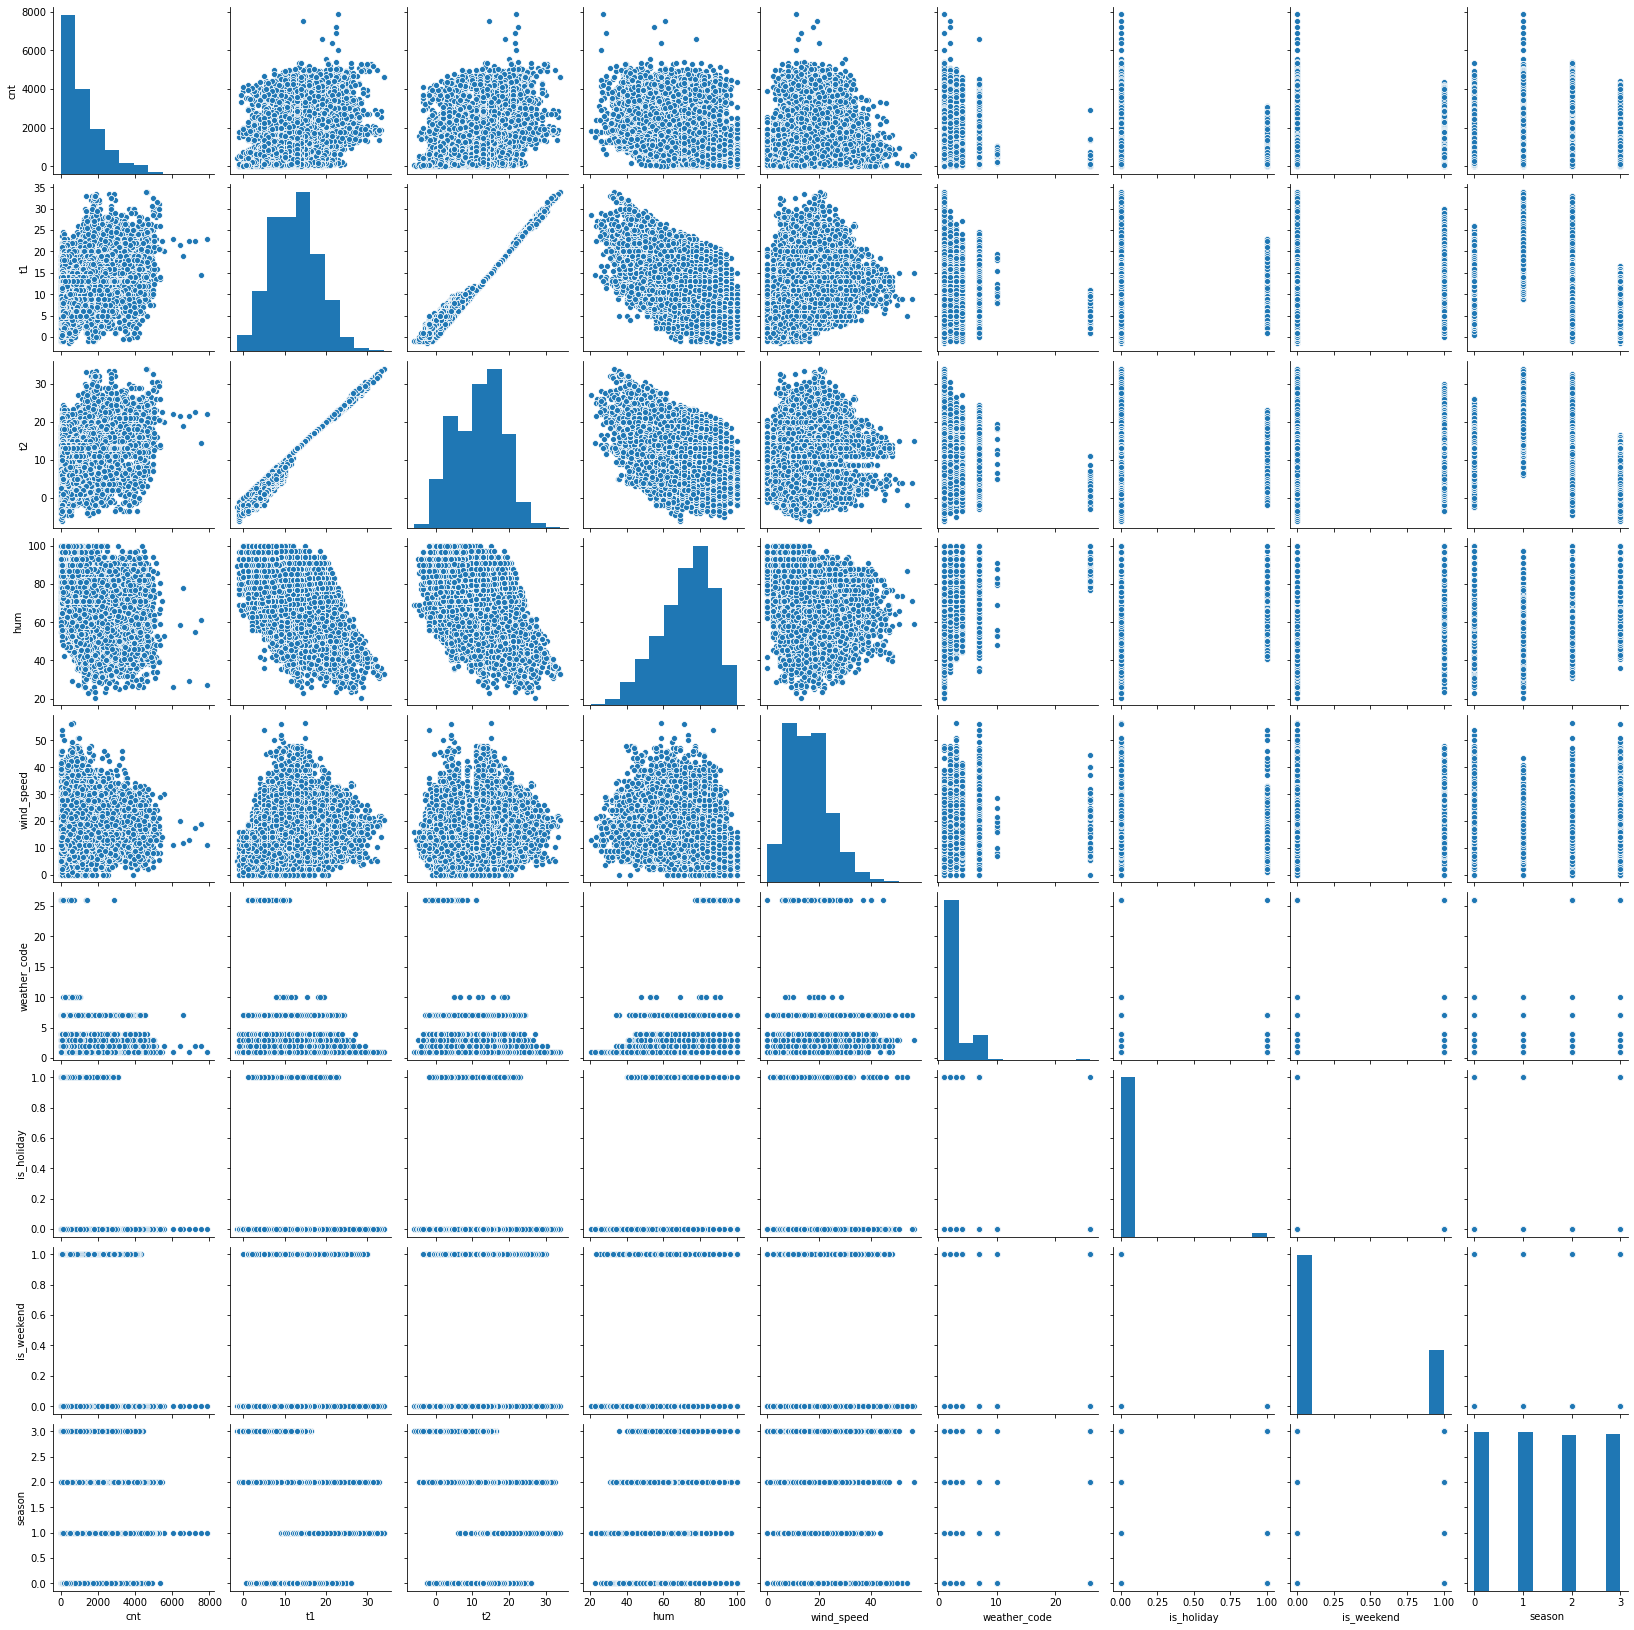

In [16]:
sns.pairplot(df)


As there are a lot of features so the pairplot is not very much helpful  

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [25]:
plt.figure(figsize=(20,20))

corr = df.corr()


<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Correlation matrix')

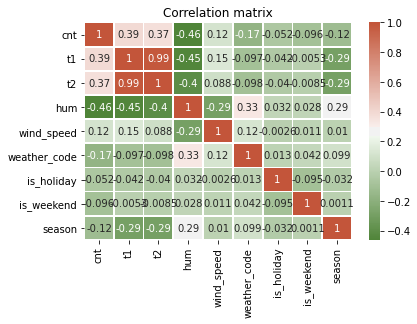

In [40]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr , cmap=cmap,annot = True, linewidths=.75)
plt.title('Correlation matrix')

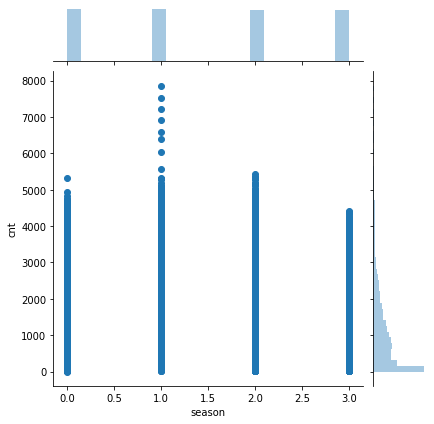

In [28]:

sns.jointplot(x="season", y="cnt", data=df);


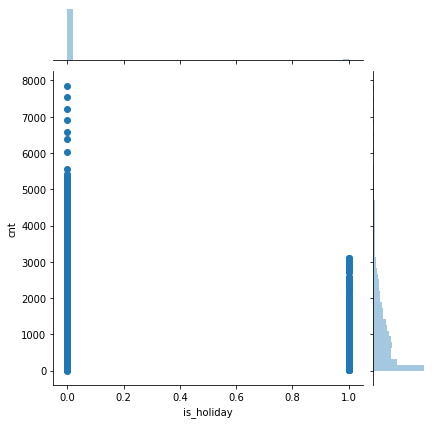

In [31]:

sns.jointplot(x="is_holiday", y="cnt", data=df);


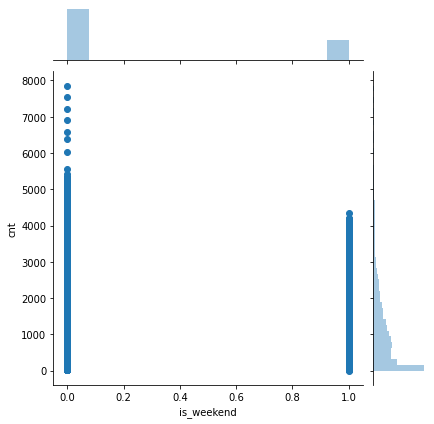

In [32]:

sns.jointplot(x="is_weekend", y="cnt", data=df);


In [ ]:
london_non_weekend = london[london['is_weekend'] == 0]
london_non_weekend = london_non_weekend.drop(['is_holiday','is_weekend'],axis=1)
london_is_weekend = london[london['is_weekend'] == 1]
london_is_weekend = london_is_weekend.drop(['is_holiday','is_weekend'],axis=1)
london_is_holiday = london[london['is_holiday'] == 1]
london_is_holiday = london_is_holiday.drop(['is_holiday','is_weekend'],axis=1)
london_non_holiday = london[london['is_holiday'] == 0]
london_non_holiday = london_non_holiday.drop(['is_holiday','is_weekend'],axis=1)

In [ ]:
def hourly_plot(df,title):
    """
    Function for plotting bike shares by hour.
    input: 
    df - pandas dataframe 
    title - main title of the plot
    
    """
    assert_true('timestamp' in set(df.columns))
    assert_true('cnt' in set(df.columns))
    
    df.groupby(by=df.timestamp.dt.hour)['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('count')
    plt.legend(['workdays','weekend','holidays'],loc=2, fontsize = 'medium')
    
hourly_plot(london_non_weekend, 'Bike shares by hour')
hourly_plot(london_is_weekend, 'Bike shares by hour')
hourly_plot(london_is_holiday, 'Bike shares by hour')